# Image Dump Script for Verilog Testbench


## Imports


In [1]:
from google.colab import files
import cv2
import numpy as np
import re

## Convert Image file to txt file for verilog

Run the below cell, and click "Browse..." to upload an image file. This script dumps the RGB value of each pixel in the format "0xFF, 0xFF, 0xFF" (for a white pixel, for example). Each row is one pixel. This can be read by the $fscanf task in Verilog!

In [3]:


def image_to_verilog_format_cv2(image_path, output_path):
    # Load the image using OpenCV (BGR format)
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at: {image_path}")

    height, width, _ = img.shape

    with open(output_path, 'w') as f:
        for y in range(height):
            for x in range(width):
                b, g, r = img[y, x]
                f.write(f"0x{r:02X}, 0x{g:02X}, 0x{b:02X}\n")

# Example usage in Google Colab:
# 1. Upload a file using the file picker
uploaded = files.upload()

# 2. Call the function using the uploaded file name
# (Replace 'your_image.png' with the actual name if different)
image_filename = list(uploaded.keys())[0]
output_txt = 'verilog_pixels.txt'

image_to_verilog_format_cv2(image_filename, output_txt)

# 3. Download the output
files.download(output_txt)


Saving output1.jpg to output1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Convert txt file from verilog to image file

Saving output_pixels.txt to output_pixels (3).txt


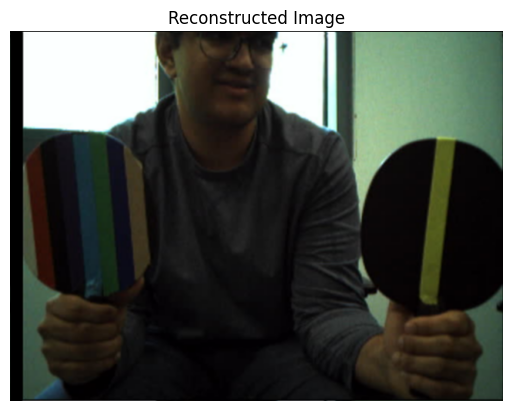

In [8]:
import cv2
import numpy as np
import re
from google.colab import files

def parse_verilog_pixel_line(line):
    # Extract 3 hex values from the line
    line = re.sub(r'0x[xX]+', '0x00', line)
    matches = re.findall(r'0x([0-9A-Fa-f]{2})', line)
    if len(matches) == 3:
        r = int(matches[0], 16)
        g = int(matches[1], 16)
        b = int(matches[2], 16)
        return (r, g, b)
    else:
        return None

def txt_to_image_display(txt_path, width, height):
    # Allocate image array (OpenCV uses BGR)
    img = np.zeros((height, width, 3), dtype=np.uint8)

    with open(txt_path, 'r') as f:
        pixels = []
        for line in f:
            rgb = parse_verilog_pixel_line(line)
            if rgb:
                pixels.append(rgb)

    if len(pixels) != width * height:
        raise ValueError(f"Pixel count {len(pixels)} does not match image size {width}x{height}")

    # Populate image array (convert RGB to BGR)
    for idx, (r, g, b) in enumerate(pixels):
        y = idx // width
        x = idx % width
        img[y, x] = (b, g, r)

    # Display image in Colab
    from matplotlib import pyplot as plt
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Reconstructed Image')
    plt.show()

# Step 1: Upload .txt file from Verilog
uploaded = files.upload()

# Step 2: Run with your known image dimensions
txt_filename = list(uploaded.keys())[0]
# Change width and height as per your original image
txt_to_image_display(txt_filename, width=640, height=480)
